In [12]:
#libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
### ETAPE 1:  Compréhension de l'Ensemble de Données ###
file_path = "C:\\Users\\DrdrA\\OneDrive\\Desktop\\UNI\\M2\\Ca\\projet\\train_ML_IOT.csv"
df = pd.read_csv(file_path)
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [14]:
### ETAPE 2: Prétraitement des Données ###

#Les schémas de circulation pendant les jours fériés, ainsi qu'à 
#diverses autres occasions au cours de l'année, diffèrent des jours de travail normaux.
# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Extract time-related features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayOfMonth'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
# weekday or weekend
#Samedi + Dimanche : weekend , lundi+mardi+merc+jeudi+vendredi: weekdays. 
df['WeekdayOrWeekend'] = df['DateTime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
print(df.columns) #added the new columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'Hour', 'DayOfWeek',
       'DayOfMonth', 'Month', 'Year', 'WeekdayOrWeekend'],
      dtype='object')


In [15]:
#finding out missing values
missing_values = df.isnull().sum()
print(missing_values) #there are none

DateTime            0
Junction            0
Vehicles            0
ID                  0
Hour                0
DayOfWeek           0
DayOfMonth          0
Month               0
Year                0
WeekdayOrWeekend    0
dtype: int64


In [16]:
#normilizing Vehicles column
min_value = df['Vehicles'].min()
max_value = df['Vehicles'].max()

df['Normalized_Vehicles'] = (df['Vehicles'] - min_value) / (max_value - min_value)

print(df['Normalized_Vehicles'])

0        0.078212
1        0.067039
2        0.050279
3        0.033520
4        0.044693
           ...   
48115    0.055866
48116    0.162011
48117    0.083799
48118    0.117318
48119    0.061453
Name: Normalized_Vehicles, Length: 48120, dtype: float64


In [17]:
print(df.head())

             DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
0 2015-11-01 00:00:00         1        15  20151101001     0          6   
1 2015-11-01 01:00:00         1        13  20151101011     1          6   
2 2015-11-01 02:00:00         1        10  20151101021     2          6   
3 2015-11-01 03:00:00         1         7  20151101031     3          6   
4 2015-11-01 04:00:00         1         9  20151101041     4          6   

   DayOfMonth  Month  Year WeekdayOrWeekend  Normalized_Vehicles  
0           1     11  2015          Weekend             0.078212  
1           1     11  2015          Weekend             0.067039  
2           1     11  2015          Weekend             0.050279  
3           1     11  2015          Weekend             0.033520  
4           1     11  2015          Weekend             0.044693  


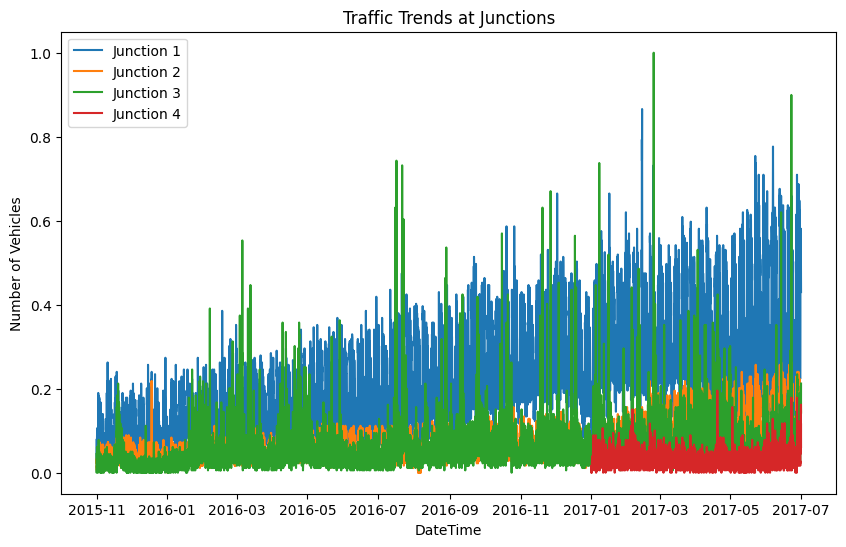

In [18]:
### ETAPE 3:  Analyse Exploratoire des Données ###
# this graph displays the traffic trends at different junctions over time. 
plt.figure(figsize=(10, 6))
for junction_id in df['Junction'].unique():
    junction_data = df[df['Junction'] == junction_id]
    plt.plot(junction_data['DateTime'], junction_data['Normalized_Vehicles'], label=f'Junction {junction_id}')

plt.title('Traffic Trends at Junctions')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

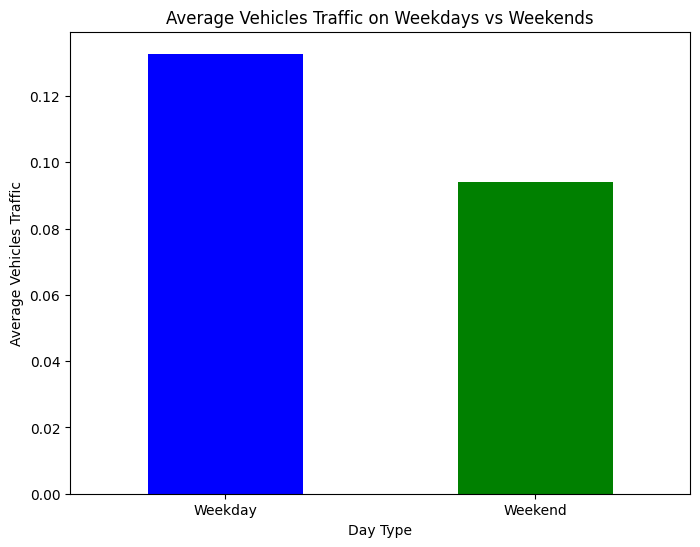

In [19]:
# this graph shows the traffic in relation to it being a weekday or not
grouped_data = df.groupby('WeekdayOrWeekend')['Normalized_Vehicles'].mean()
# Creating a bar plot
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Vehicles Traffic on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Vehicles Traffic')
plt.xticks(rotation=0)
plt.show()

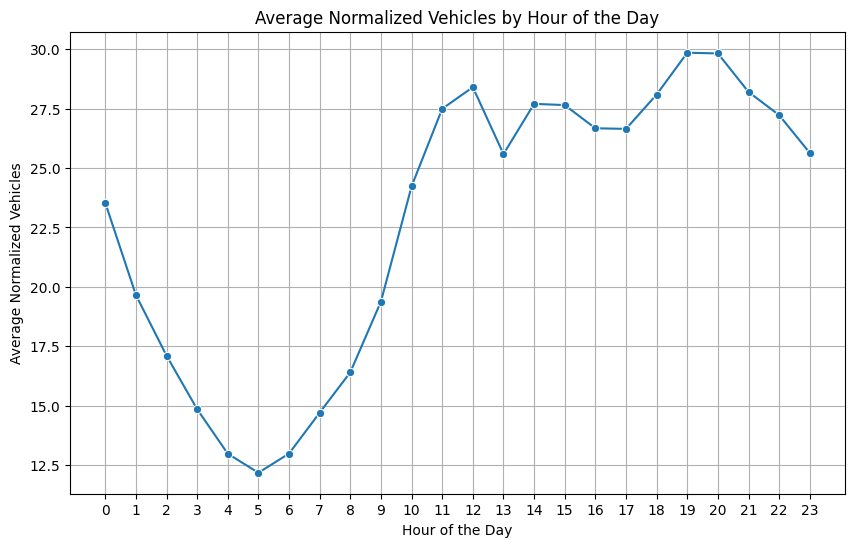

In [20]:
# this graph explores the relation of the traffic with the hour of the days
hourly_data = df.groupby('Hour')['Vehicles'].mean()

# Creating a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_data.index, y=hourly_data.values, marker='o')
plt.title('Average Normalized Vehicles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Normalized Vehicles')
plt.xticks(range(24))  # Setting x-axis ticks for each hour
plt.grid(True)
plt.show()

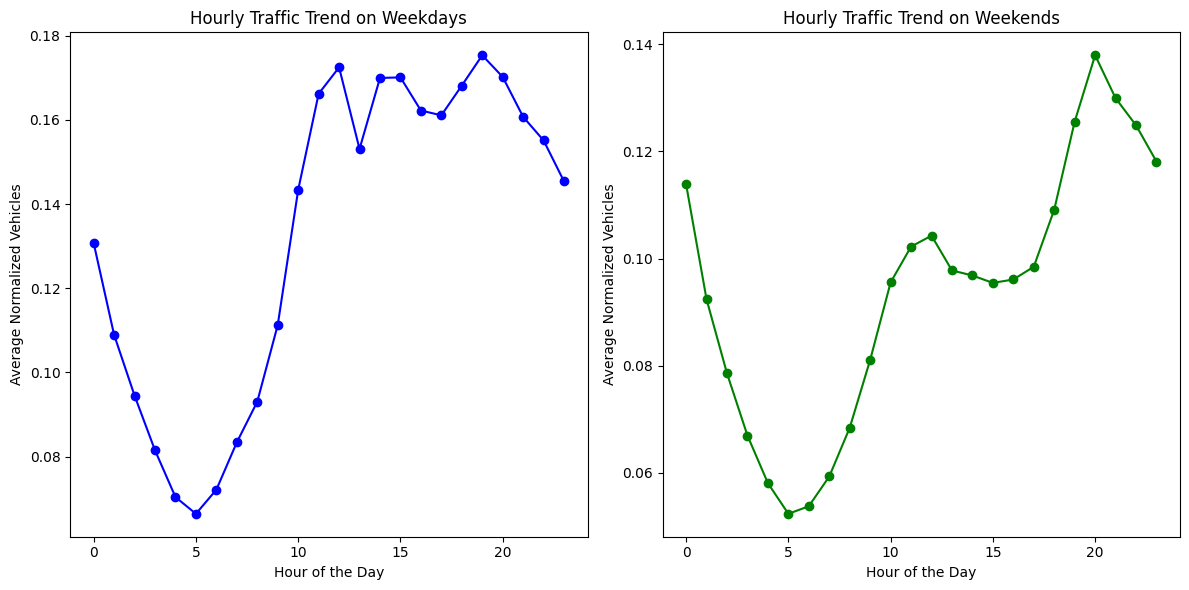

In [21]:
# Filter data for weekdays and weekends
weekdays_data = df[df['WeekdayOrWeekend'] == 'Weekday']
weekends_data = df[df['WeekdayOrWeekend'] == 'Weekend']

# Group data by hour and calculate the mean vehicles for weekdays and weekends
weekdays_hourly_mean = weekdays_data.groupby('Hour')['Normalized_Vehicles'].mean()
weekends_hourly_mean = weekends_data.groupby('Hour')['Normalized_Vehicles'].mean()

# Create two subplots for weekdays and weekends
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
weekdays_hourly_mean.plot(kind='line', marker='o', color='blue')
plt.title('Hourly Traffic Trend on Weekdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Normalized Vehicles')

plt.subplot(1, 2, 2)
weekends_hourly_mean.plot(kind='line', marker='o', color='green')
plt.title('Hourly Traffic Trend on Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Normalized Vehicles')

plt.tight_layout()
plt.show()